# Les types de modèles de propagation

* Le modèle SI est un modèle où il n'y a que deux possibilités : ou bien l'individu est susceptible d'être infecté (S), ou bien il est infecté à vie (I). Cela s'applique par exemple au cas du SIDA. Pour le coronavirus, nous ne l'utiliserons pas.
* Le modèle SIR est un modèle où l'individu peut être guéri du virus, et être donc immunisé (R). Ce modèle s'applique bien au problème du coronavirus, et nous l'avons déjà modélisé.
* Le modèle SIS est un modèle où l'individu peut guérir, mais est alors de nouveau susceptible d'être infecté. Il n'y a pas d'immunité. On va tester ce modèle là, puisque nous n'avons pas la certitude qu'il est impossible de contracter plusieurs fois le coronavirus. 
* Dans le modèle SEIR, il y a un état intermédiaire, exposé (E). Un individu qui a été au contact d'une personne infectée devient infecté avec une certaine probabilité. L'individu peut être susceptible, exposé, infecté puis immunisé.
* Le modèle SEIS est identique au modèle SEIR mais sans immunité.

D'autres caractéristiques peuvent être ajoutées à ces modèles, tels que la possibilité de déceder (D), d'être mis en quarantaine (Q) ou encore d'êre immunisé à la naissance (M).

# Choix d'un modèle de propagation du virus

Je vais donc tester un modèle SIS où les individus qui guérissent du coronavirus sont de nouveau susceptobles de tomber malade.

In [1]:
import datetime
import os
import yaml

import numpy as np
import pandas as pd

In [2]:
# Lecture du fichier d'environnement
ENV_FILE = '..\env.yaml'
with open(ENV_FILE) as f:
    params = yaml.load(f , Loader=yaml.FullLoader)

# Initialisation des chemins vers les fichiers
ROOT_DIR = os.path.dirname(os.path.abspath(ENV_FILE))
DATA_FILE = os.path.join(ROOT_DIR,
                         params['directories']['processed'],
                         params['files']['all_data'])

# Lecture du fichier de données
epidemie_df = (pd.read_csv(DATA_FILE, parse_dates=['Last Update'])
    .assign(day=lambda _df: _df['Last Update'].dt.date)
               .drop_duplicates(subset=['Country/Region', 'Province/State', 'day'])
               [lambda df: df['day'] <= datetime.date(2020, 3, 12)]
    )

In [3]:
epidemie_df =epidemie_df.groupby(['Country/Region', 'day']).sum()
epidemie_df['Infected'] = epidemie_df['Confirmed'].groupby(['Country/Region']).diff()
epidemie_df = epidemie_df.reset_index()

In [4]:
# Importation de la base de données de la Banque Mondiale pour la population par pays en 2018

import pandas as pd

pop_df = pd.read_excel(r'..\Population.xlsx')

In [5]:
pop_df = pop_df[['Country Name','2018 [YR2018]']]
pop_df = pop_df.rename(columns={"Country Name": "Country", "2018 [YR2018]": "Population"})

In [6]:
epidemie_df = epidemie_df.rename(columns={'Country/Region':'Country'})

In [7]:
# Pour pouvoir merger les deux base de données, je fais en sorte que les noms des pays soient identiques

pop_df.loc[(pop_df.Country == 'Brunei Darussalam'),'Country']='Brunei'
pop_df.loc[(pop_df.Country == 'Congo, Dem. Rep.'),'Country']='Congo (Kinshasa)'
pop_df.loc[(pop_df.Country == 'United States'),'Country']='US'
pop_df.loc[(pop_df.Country == 'Egypt, Arab Rep.'),'Country']='Egypt'
pop_df.loc[(pop_df.Country == 'United Kingdom'),'Country']='UK'
pop_df.loc[(pop_df.Country == 'Hong Kong SAR, China'),'Country']='Hong Kong'
pop_df.loc[(pop_df.Country == 'Iran, Islamic Rep.'),'Country']='Iran'
pop_df.loc[(pop_df.Country == 'Korea, Rep.'),'Country']='South Korea'
pop_df.loc[(pop_df.Country == 'Macao SAR, China'),'Country']='Macau'
pop_df.loc[(pop_df.Country == 'China'),'Country']='Mainland China'
pop_df.loc[(pop_df.Country == 'Russian Federation'),'Country']='Russia'
pop_df.loc[(pop_df.Country == 'St. Martin (French part)'),'Country']='Saint Martin'
pop_df.loc[(pop_df.Country == 'Slovak Republic'),'Country']='Slovakia'

In [8]:
# Je merge les deux base de données, certaines regions n'ont pas pu être mergées
# Pour celles-là, il faudra entrer manuellement la population

final_df=pd.merge(epidemie_df, pop_df, on='Country', how='outer', indicator=True)
final_df=final_df[final_df['_merge'] == "both"]

In [9]:
# Cette fonction défini la taille de la population selon le pays pour lequel on veut avoir la propagation du virus

def pop_pays(pays):
    global pop
    pop=final_df[final_df['Country'] == pays]['Population'].iloc[0]

In [15]:
# Choix du pays à modéliser

pop_pays('France')
pop

66987244

In [16]:
# Modèle SIS

import matplotlib.pylab as plt

S = pop - 1
I = 1
beta = 0.2
gamma = 0.01

sus = []
inf = []

def infection(S, I, pop):
    for t in range (0, 500):
        S, I = S - beta * ((S * I / pop)) + gamma * I, I + beta * ((S * I) / pop) - gamma * I

        sus.append(S)
        inf.append(I)


infection(S, I, pop)



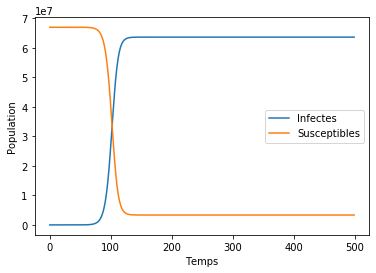

In [20]:
figure = plt.figure()
figure.canvas.set_window_title('SIS model')

infectes,=plt.plot(inf, label='Infectes')

susceptibles,=plt.plot(sus, label='Susceptibles')

plt.legend(handles=[infectes, susceptibles])


plt.xlabel('Temps')
plt.ylabel('Population')

plt.show()

In [21]:
pop_pays('Mainland China')
pop

1392730000

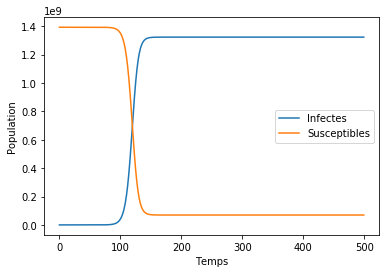

In [22]:
# Modèle SIS

import matplotlib.pylab as plt

S = pop - 1
I = 1
beta = 0.2
gamma = 0.01

sus = []
inf = []

def infection(S, I, pop):
    for t in range (0, 500):
        S, I = S - beta * ((S * I / pop)) + gamma * I, I + beta * ((S * I) / pop) - gamma * I

        sus.append(S)
        inf.append(I)


infection(S, I, pop)

figure = plt.figure()
figure.canvas.set_window_title('SIS model')

infectes,=plt.plot(inf, label='Infectes')

susceptibles,=plt.plot(sus, label='Susceptibles')

plt.legend(handles=[infectes, susceptibles])


plt.xlabel('Temps')
plt.ylabel('Population')

plt.show()